van der Waals's Equation of State
==
This notebook intends to present van der Waals's Equation of State([wikipedia](https://en.wikipedia.org/wiki/Van_der_Waals_equation),[nobel prize lecture](http://www.nobelprize.org/nobel_prizes/physics/laureates/1910/waals-lecture.pdf)), and to derive some fundamental thermodynamic properties from that, according to the rules of calculus of classical thermodynamics relations ([Tester,Model,1997](http://www.isbnsearch.org/isbn/9780139153563),[Michelsen, Mollerup, 2007](http://www.forskningsdatabasen.dk/en/catalog/108130984)).

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sympy import Function, symbols, Derivative, ln, init_printing, lambdify

In [3]:
init_printing()

In [4]:
n_i,R,T,V,sqrt2=symbols("n_i,R,T,V,sqrt2")

In [5]:
a = Function("a")(n_i)
b = Function("b")(n_i)
n = Function("n")(n_i)

In [6]:
A=n*R*T*ln((V)/(V-b))+((a)/(2*sqrt2*b))*(ln((V+b-sqrt2*b)/(V+b+sqrt2*b)))

In [7]:
sympy_PHI = Derivative(A,n_i,evaluate=True)

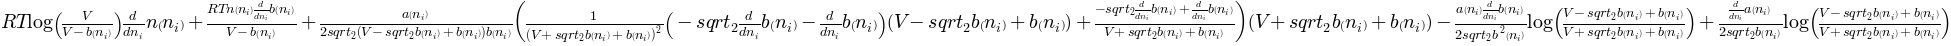

In [8]:
sympy_PHI #auto formatted print

In [9]:
print(sympy_PHI)

R*T*log(V/(V - b(n_i)))*Derivative(n(n_i), n_i) + R*T*n(n_i)*Derivative(b(n_i), n_i)/(V - b(n_i)) + ((-sqrt2*Derivative(b(n_i), n_i) - Derivative(b(n_i), n_i))*(V - sqrt2*b(n_i) + b(n_i))/(V + sqrt2*b(n_i) + b(n_i))**2 + (-sqrt2*Derivative(b(n_i), n_i) + Derivative(b(n_i), n_i))/(V + sqrt2*b(n_i) + b(n_i)))*(V + sqrt2*b(n_i) + b(n_i))*a(n_i)/(2*sqrt2*(V - sqrt2*b(n_i) + b(n_i))*b(n_i)) - a(n_i)*log((V - sqrt2*b(n_i) + b(n_i))/(V + sqrt2*b(n_i) + b(n_i)))*Derivative(b(n_i), n_i)/(2*sqrt2*b(n_i)**2) + log((V - sqrt2*b(n_i) + b(n_i))/(V + sqrt2*b(n_i) + b(n_i)))*Derivative(a(n_i), n_i)/(2*sqrt2*b(n_i))


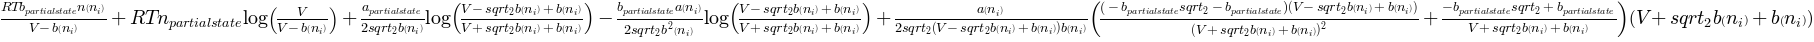

In [10]:
#a_partial = symbols('Derivative(a(n_i), n_i)')
#b_partial = symbols('Derivative(b(n_i), n_i)')
#n_partial = symbols('Derivative(n(n_i), n_i)')

a_state = symbols('a_state')
b_state = symbols('b_state')
n_state = symbols('n_state')
a_partial_state = symbols('a_partial_state')
b_partial_state = symbols('b_partial_state')
n_partial_state = symbols('n_partial_state')

sympy_PHI = sympy_PHI.subs('Derivative(a(n_i), n_i)', a_partial_state)
sympy_PHI = sympy_PHI.subs('Derivative(b(n_i), n_i)', b_partial_state)
sympy_PHI = sympy_PHI.subs('Derivative(n(n_i), n_i)', n_partial_state)

sympy_PHI

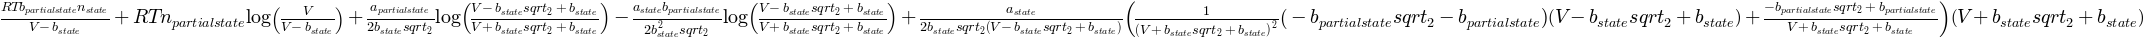

In [11]:
sympy_PHI = sympy_PHI.subs(a, a_state)
sympy_PHI = sympy_PHI.subs(b, b_state)
sympy_PHI = sympy_PHI.subs(n, n_state)

sympy_PHI

In [12]:
print(sympy_PHI)

R*T*b_partial_state*n_state/(V - b_state) + R*T*n_partial_state*log(V/(V - b_state)) + a_partial_state*log((V - b_state*sqrt2 + b_state)/(V + b_state*sqrt2 + b_state))/(2*b_state*sqrt2) - a_state*b_partial_state*log((V - b_state*sqrt2 + b_state)/(V + b_state*sqrt2 + b_state))/(2*b_state**2*sqrt2) + a_state*((-b_partial_state*sqrt2 - b_partial_state)*(V - b_state*sqrt2 + b_state)/(V + b_state*sqrt2 + b_state)**2 + (-b_partial_state*sqrt2 + b_partial_state)/(V + b_state*sqrt2 + b_state))*(V + b_state*sqrt2 + b_state)/(2*b_state*sqrt2*(V - b_state*sqrt2 + b_state))


In [13]:
Phi = lambdify(    
    (
        R, T, V, b, sqrt2, a,
        b_partial_state, a_partial_state, n_partial_state,
        b_state, a_state, n_state
    ),
    sympy_PHI,
    "numpy")

In [14]:
Phi(8,273,2,1,1.4,1,1,1,1,1,1,1)

# External references
http://docs.sympy.org/latest/tutorial/basic_operations.html
http://docs.sympy.org/latest/modules/utilities/lambdify.html